In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [24]:
df = pd.read_csv("C:/Users/rgangurde/Downloads/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression.

In [25]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


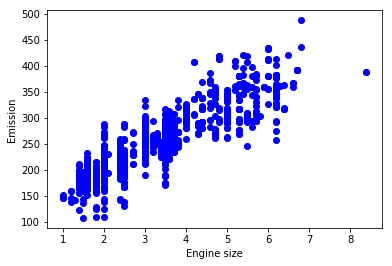

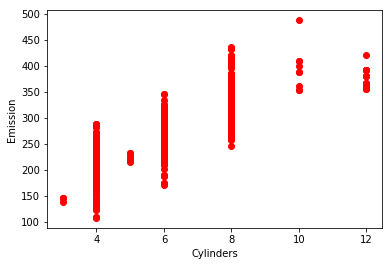

In [26]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X = cdf[['ENGINESIZE','CYLINDERS']].values
Y = cdf['CO2EMISSIONS'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 3)

In [43]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [29.81657621  8.083653  ]


<h2 id="prediction">Prediction</h2>

In [44]:
y_hat = regr.predict(x_test)

print("MSE:", np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score:',regr.score(x_test, y_test))

MSE: 878.3661506216556
Variance score: 0.7652751949695565


In the previous model we used 2 features.
The next model uses 4 features

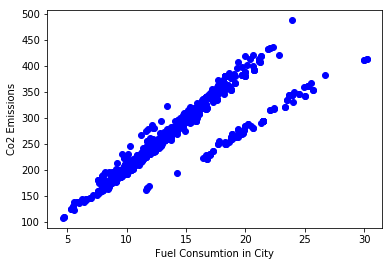

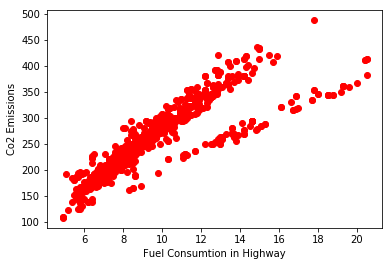

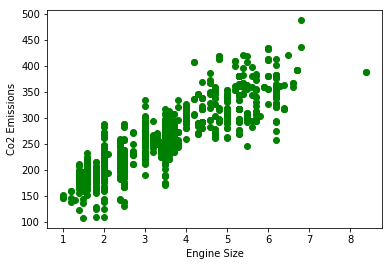

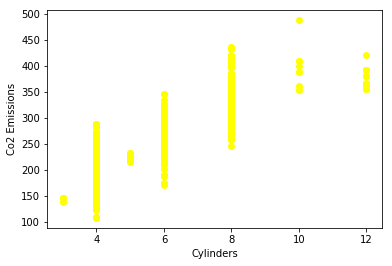

In [3]:
cdf = df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CYLINDERS','CO2EMISSIONS']]

plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Fuel Consumtion in City')
plt.ylabel('Co2 Emissions')
plt.show()

plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel('Fuel Consumtion in Highway')
plt.ylabel('Co2 Emissions')
plt.show()

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'green')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()


plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'YELLOW')
plt.xlabel('Cylinders')
plt.ylabel('Co2 Emissions')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X = cdf[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CYLINDERS']].values
Y = cdf['CO2EMISSIONS'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('coefficients : ',regr.coef_)

coefficients :  [12.38490443  6.63091799  2.66661188  5.76143795]


In [39]:
yHat = regr.predict(x_test)
print('MSE : ', np.mean((yHat-y_test)**2))
print('Variance Score : ', regr.score(x_test, y_test))

MSE :  512.7915940772565
Variance Score :  0.8661334817303052
